In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2

In [23]:
import pandas as pd # data analysis toolkit - create, read, update, delete datasets
import numpy as np #matrix math
#for command line arguments
import argparse
#for reading files
import os
#for ploting graph
import matplotlib.pyplot as plt
import timeit
import math

In [24]:
import nbimporter # pip install nbimporter
import utils as utils
import importlib
importlib.reload(utils)

<module 'utils' from '/home/ploymel/Desktop/imitation_learning/utils.py'>

In [25]:
def load_data(folder_name, test_size_value=0.4):
    """
    Load training data and split it into training and validation set
    """
    #reads CSV file into a single dataframe variable
    data_train = pd.read_csv(os.path.join(os.getcwd(), '_out', folder_name, 'train/data.csv'))
    data_val = pd.read_csv(os.path.join(os.getcwd(), '_out', folder_name, 'test/data.csv'))

    #yay dataframes, we can select rows and columns by their names
    #we'll store the camera images as our input data
    X_train = data_train[['image_path', 'speed']].values
    #and our steering commandas as our output data
    Y_train = data_train[['throttle', 'steering_angle', 'brake', 'high_level_command']].values
    
    #yay dataframes, we can select rows and columns by their names
    #we'll store the camera images as our input data
    X_valid = data_val[['image_path', 'speed']].values
    #and our steering commandas as our output data
    Y_valid = data_val[['throttle', 'steering_angle', 'brake', 'high_level_command']].values
    
    # we're going to use all training data so, we will use only len(X_train) * 40 / 60 of validating data
    # so, our ratio is going to be 60% for training set and 40% for validation set and for testing
    # we're going to test in the simulation environment which is town01
    forty_percent = math.floor((X_train.shape[0] * 40) / 60)
    X_valid = X_valid[:forty_percent]
    Y_valid = Y_valid[:forty_percent, :]

    

    print("X_train shape = ", X_train.shape)
    print("X_valid shape = ", X_valid.shape)
    print("Y_train shape = ", Y_train.shape)
    print("Y_valid shape = ", Y_valid.shape)

    return X_train, X_valid, Y_train, Y_valid

In [26]:
X_train, X_valid, Y_train, Y_valid = load_data('no_obstacle_no_traffic')
X_train

X_train shape =  (34284, 2)
X_valid shape =  (15000, 2)
Y_train shape =  (34284, 4)
Y_valid shape =  (15000, 4)


array([['_out/no_obstacle_no_traffic/train/images/000000000.png',
        0.005103202536184914],
       ['_out/no_obstacle_no_traffic/train/images/000000001.png',
        0.018060954097018384],
       ['_out/no_obstacle_no_traffic/train/images/000000002.png',
        0.018060954097018384],
       ...,
       ['_out/no_obstacle_no_traffic/train/images/000034997.png',
        20.063712912566267],
       ['_out/no_obstacle_no_traffic/train/images/000034998.png',
        19.670763324924227],
       ['_out/no_obstacle_no_traffic/train/images/000034999.png',
        19.270036658580736]], dtype=object)

# Dataset RGB Image 
image size = 66 x 200

Output filename = _out/no_obstacle_no_traffic/train/images/000000000.png


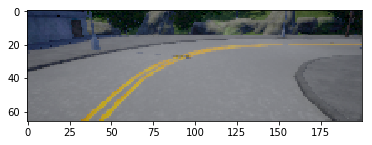

In [7]:
print("Output filename = %s" % X_train[0][0])
image = utils.load_image(X_train[0][0])
utils.show_image(image)

## Data Argmentation (For Center-camera image)

### 1. Brightness Augmentation
Brightness is randomly changed to simulate different light
conditions. We generate augmented images with different
brightness by first converting images to HSV, scaling up or
down the V channel and converting back to the RGB channel.
Following are typical augmented images.

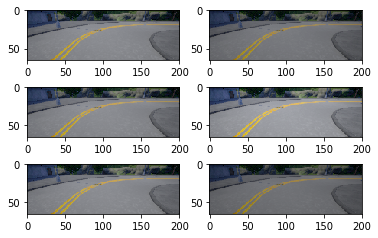

In [8]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    utils.show_image(image)
    random_brightness = utils.random_brightness(image)
    plt.subplot(num_samples,2,i+2+j)
    random_brightness = utils.random_brightness(image)
    utils.show_image(random_brightness)
plt.show()

### 2. Contrast Augmentation

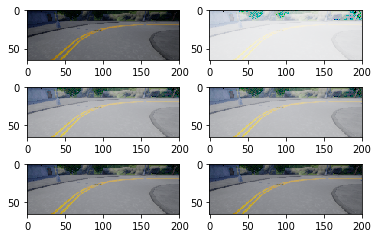

In [9]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_contrast = utils.random_contrast(image)
    utils.show_image(random_contrast)
    plt.subplot(num_samples,2,i+2+j)
    random_contrast = utils.random_contrast(image)
    utils.show_image(random_contrast)
plt.show()

### 3. Sharpen Augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


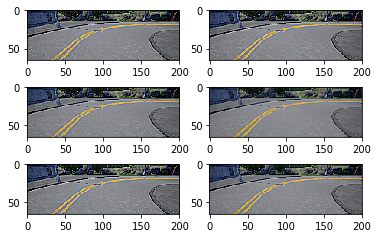

In [10]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_sharpen = utils.random_sharpen(image)
    utils.show_image(random_sharpen)
    plt.subplot(num_samples,2,i+2+j)
    random_sharpen = utils.random_sharpen(image)
    utils.show_image(random_sharpen)
plt.show()

### 4. Addition Augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


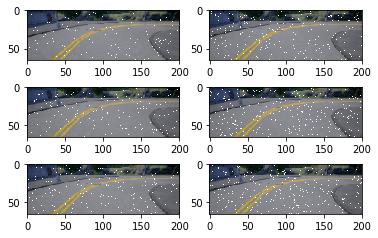

In [11]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_addition_augment = utils.random_addition_augment(image)
    utils.show_image(random_addition_augment)
    plt.subplot(num_samples,2,i+2+j)
    random_addition_augment = utils.random_addition_augment(image)
    utils.show_image(random_addition_augment)
plt.show()

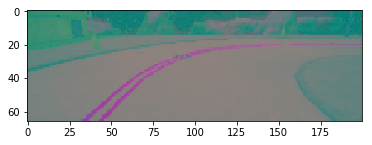

In [12]:
utils.show_image(utils.preprocess(image))

## Preprocessing

### 1. RGB -> YUV

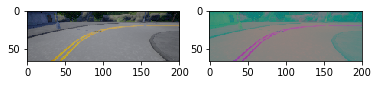

In [13]:
num_samples = 1

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    utils.show_image(image)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(image)
    utils.show_image(preprocess)
plt.show()

### 2. Brightness Augmentation-> YUV

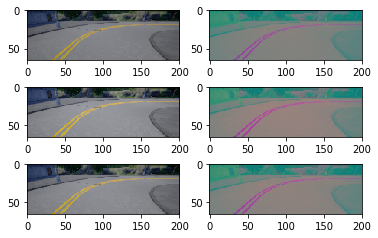

In [14]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_brightness = utils.random_brightness(image)
    utils.show_image(random_brightness)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(random_brightness)
    utils.show_image(preprocess)
plt.show()

### 3. Contrast Argumentation -> YUV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


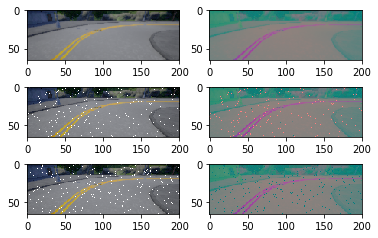

In [15]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_contrast = utils.random_addition_augment(image)
    utils.show_image(random_contrast)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(random_contrast)
    utils.show_image(preprocess)
plt.show()

### 4. Additional Augmentation -> YUV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


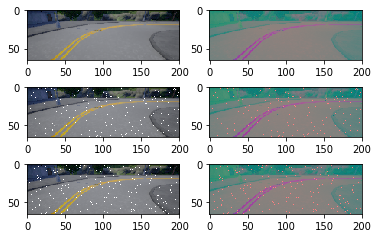

In [16]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_addition_augment = utils.random_addition_augment(image)
    utils.show_image(random_addition_augment)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(random_addition_augment)
    utils.show_image(preprocess)
plt.show()

In [28]:
for i in X_valid:
    try:
        utils.load_image(i[0])
    except:
        print(i[0])

_out/no_obstacle_no_traffic/test/images/000000009.png
_out/no_obstacle_no_traffic/test/images/000000009.png
_out/no_obstacle_no_traffic/test/images/000000058.png
_out/no_obstacle_no_traffic/test/images/000000058.png
_out/no_obstacle_no_traffic/test/images/000000216.png
_out/no_obstacle_no_traffic/test/images/000000216.png
_out/no_obstacle_no_traffic/test/images/000000252.png
_out/no_obstacle_no_traffic/test/images/000000252.png
_out/no_obstacle_no_traffic/test/images/000000340.png
_out/no_obstacle_no_traffic/test/images/000000340.png
_out/no_obstacle_no_traffic/test/images/000000483.png
_out/no_obstacle_no_traffic/test/images/000000483.png
_out/no_obstacle_no_traffic/test/images/000000580.png
_out/no_obstacle_no_traffic/test/images/000000580.png
_out/no_obstacle_no_traffic/test/images/000000597.png
_out/no_obstacle_no_traffic/test/images/000000597.png
_out/no_obstacle_no_traffic/test/images/000000644.png
_out/no_obstacle_no_traffic/test/images/000000644.png
_out/no_obstacle_no_traffic/

_out/no_obstacle_no_traffic/test/images/000004999.png
_out/no_obstacle_no_traffic/test/images/000004999.png
_out/no_obstacle_no_traffic/test/images/000005090.png
_out/no_obstacle_no_traffic/test/images/000005090.png
_out/no_obstacle_no_traffic/test/images/000005135.png
_out/no_obstacle_no_traffic/test/images/000005135.png
_out/no_obstacle_no_traffic/test/images/000005622.png
_out/no_obstacle_no_traffic/test/images/000005622.png
_out/no_obstacle_no_traffic/test/images/000006049.png
_out/no_obstacle_no_traffic/test/images/000006049.png
_out/no_obstacle_no_traffic/test/images/000006059.png
_out/no_obstacle_no_traffic/test/images/000006059.png
_out/no_obstacle_no_traffic/test/images/000006106.png
_out/no_obstacle_no_traffic/test/images/000006106.png
_out/no_obstacle_no_traffic/test/images/000006129.png
_out/no_obstacle_no_traffic/test/images/000006129.png
_out/no_obstacle_no_traffic/test/images/000006187.png
_out/no_obstacle_no_traffic/test/images/000006187.png
_out/no_obstacle_no_traffic/

_out/no_obstacle_no_traffic/test/images/000012973.png
_out/no_obstacle_no_traffic/test/images/000012973.png
_out/no_obstacle_no_traffic/test/images/000012993.png
_out/no_obstacle_no_traffic/test/images/000012993.png
_out/no_obstacle_no_traffic/test/images/000013024.png
_out/no_obstacle_no_traffic/test/images/000013024.png
_out/no_obstacle_no_traffic/test/images/000013054.png
_out/no_obstacle_no_traffic/test/images/000013054.png
_out/no_obstacle_no_traffic/test/images/000013094.png
_out/no_obstacle_no_traffic/test/images/000013094.png
_out/no_obstacle_no_traffic/test/images/000013146.png
_out/no_obstacle_no_traffic/test/images/000013146.png
_out/no_obstacle_no_traffic/test/images/000013164.png
_out/no_obstacle_no_traffic/test/images/000013164.png
_out/no_obstacle_no_traffic/test/images/000013174.png
_out/no_obstacle_no_traffic/test/images/000013174.png
_out/no_obstacle_no_traffic/test/images/000013226.png
_out/no_obstacle_no_traffic/test/images/000013226.png
_out/no_obstacle_no_traffic/